## 实验题目1 拉格朗日(Lagrange)插值

### 实验简介

本实验为拉格朗日插值实验，需要完成拉格朗日插值的代码编写并通过求解实验题目的答案。

本次实验过程中，主要为学习拉格朗日插值的代码编写，同时深入的理解、体会教材所言拉格朗日插值代码编写简洁的优点，同时从程序执行的流程理解其算法本身的缺陷。

实验的目的即为使用拉格朗日插值法求解函数的近似值。

该实验报告主要分为8个部分，大纲罗列如下:

- 实验简介：即本部分的所有内容
- **数学原理**：对拉格朗日插值算法的数学原理进行阐述
- **代码实现**：使用`Julia`语言，根据数学原理，编写实验代码
- 测试代码：对于程序的运行、输出进行测试的部分
  - Test 1 - Simple: 使用教材例题对程序运行进行简单的测试，确保基本的程序流程的正确性
  - Test 2 - Performance: 本实验中主要是对于不同代码实现性能的测试，最终选择了耗时更短的实现，同时由于运行较为耗时，最终会处于被注释的状态
- **实验题目**：实验指导书中所要求完成的实验题目，作有便于直观观察的**示意图**，但呈现的执行细节相对较多，为方便最终批阅答案可查看**答案汇总**
  - 执行代码：本部分是对于各个问题求解的过程进行封装，对于外界只需要传入问题所需参数，在封装好的代码内部会调用函数，完成插值求解多项式、绘制示意图以及打印实验结果的部分
  - 问题1：探究插值的阶数和准确性的关系，观察Runge现象，切身体会为什么不建议使用高阶的多项式插值函数
  - 问题2：探究插值的区间长度选取和待插值函数的关系，从两个不同的函数对于不同阶数插值、在不同的区间长度下插值对于拟合结果的影响，理解进行插值时选取合适的插值区间来达到期望的拟合精度和对计算资源的节省，是基于对函数本身特点的认识的
  - 问题4：探究插值外推和内插的相对可靠性，从直觉上很容易意识到内插是比外推可靠的，但这一未经数学证明的结论需要更深入的数学知识，我们通过对部分实例进行探索，从实例呈现的插值结果来看，这一结论成立的条件是基于函数的性质的。
- **答案汇总**：本部分将上述实验题目所计算的答案汇总至此，以表格的形式方便查看和批阅
- **思考题**：本部分为实验指导书中所要求的完成的思考题解答
  

### 数学原理

#### 插值基函数

令$l_j\left( x \right) \left( j=0,1,2,\cdots ,n \right) $表示$n$次多项式,满足条件
$$
l_j\left( x_i \right) =\begin{cases}
	0, i\ne j,\\
	1, i=j,\\
\end{cases},  j,i=0,1,\cdots ,n.
$$
我们称$l_j\left( x \right) \left( j=0,1,2,\cdots ,n \right) $为多项式的插值基函数.

#### Lagrange插值公式

显然,存在n次多项式
$$
y\left( x \right) =\sum_{j=0}^n{f\left( x_j \right) l_j\left( x \right)}. \ \ \ \left(*\right)
$$
满足插值条件式,故问题可以归结为构造满足插值基函数的n次多项式$l_j\left( x \right) \left( j=0,1,2,\cdots ,n \right) $

很容易得知,$l_j(x)$应该有$n$个零点$x_0,\cdots ,x_{j-1},x_{j+1},\cdots ,x_n$,又因为$l_j(x)$是$n$次多项式，所以一定具有形式
$$
l_j\left( x \right) =A_j\left( x-x_0 \right) \cdots \left( x-x_{j-1} \right) \left( x-x_{j+1} \right) \cdots \left( x-x_n \right) ,
$$
其中,$A_j$是与$x$无关的数,由$l_j\left( x_j \right) =1$可以确定,即
$$
l_j\left( x_j \right) = 1 =A_j\left( x_j-x_0 \right) \cdots \left( x_j-x_{j-1} \right) \left( x_j-x_{j+1} \right) \cdots \left( x_j-x_n \right) ,
$$
故有
$$
l_j\left( x \right) =\frac{\left( x-x_0 \right) \left( x-x_1 \right) \cdots \left( x-x_{j-1} \right) \left( x-x_{j+1} \right) \cdots \left( x-x_n \right)}{\left( x_j-x_0 \right) \left( x_j-x_1 \right) \cdots \left( x_j-x_{j-1} \right) \left( x_j-x_{j+1} \right) \cdots \left( x_j-x_n \right)}, j=0,1,2,\cdots ,n. \ \ \ \left(**\right)
$$

综上所述,当$n$次多项式$l_j\left( x \right) \left( j=0,1,2,\cdots ,n \right) $由$\left(**\right($方程确定时,$n$次多项式满足插值条件式.可以证明,这样的多项式是唯一的.

我们称式$\left(*\right)$为Lagrange插值公式,  $\left(**\right)$为Lagrange插值多项式,记为$L_n(x)$.

### 代码实现

此处的代码，实际上就是将上述的$(*)$和$(**)$式用编程语言重新表示，较为直接，用于编程对照的公式如下：
$$
y\left( x \right) =\sum_{j=0}^n{f\left( x_j \right) l_j\left( x \right)}. \ \ \ \left(*\right)
\\
l_j\left( x \right) =\frac{\left( x-x_0 \right) \left( x-x_1 \right) \cdots \left( x-x_{j-1} \right) \left( x-x_{j+1} \right) \cdots \left( x-x_n \right)}{\left( x_j-x_0 \right) \left( x_j-x_1 \right) \cdots \left( x_j-x_{j-1} \right) \left( x_j-x_{j+1} \right) \cdots \left( x_j-x_n \right)}, j=0,1,2,\cdots ,n. \ \ \ \left(**\right)
$$


首先导入需要使用的包

In [63]:
using Printf
using Plots
using Statistics
using LinearAlgebra
using LaTeXStrings
using PrettyTables

然后，在此处定义lagrange插值函数，这里对其进行函数重载，用于适应传入的测试参数为单个数值和一组数值（向量）的情形

In [64]:
# Lagrange Interpolation method
# 对函数进行重载，既可以对单个的点进行测试，也可以测试一系列的点
function lagrange(xs, fxs, x::Number)
    num = size(xs, 1)
    y, i = 0.0, 1
    while i <= num
        li = 1.0
        for j in 1:num
            if j == i
                continue
            end
            li *= (x - xs[j]) / (xs[i] - xs[j])
        end
        y += li * fxs[i]
        i += 1
    end
    x, y
end
function lagrange(xs, fxs, x::Vector)
    num = size(xs, 1)
    y, i = zeros(size(x, 1)), 1
    while i <= num
        li = fill(1.0,size(x,1))
        for j in 1:num
            if j == i
                continue
            end
            li = li .* (x .- xs[j]) / (xs[i] - xs[j])
        end
        y = y + li .* fxs[i]
        i += 1
    end
    x, y
end

lagrange (generic function with 2 methods)

### 测试代码

#### Test 1 - Simple

首先，使用教材例题作为简单的测试，用于代码正确性基本的检验，检查对于已给点的正确拟合，以及对内插和外插的分别简单测试。

In [65]:
test_x = xs = [0, 2, 3, 5, 6]
test_y = ys = [1, 3, 2, 5, 6]
@time _,pred_y = lagrange(xs, ys, test_x)
data = [test_x test_y pred_y]
header = (["Test x", "Test y", "Pred y"])
pretty_table(
    data;
    alignment=[:c, :c, :c],
    header=header,
    # header_crayon=crayon"bold",
    # tf = tf_markdown,
    formatters=ft_printf("%11.6f"))

test_x = [-1, 0, 1, 2, 3, 4, 5, 6, 7]
test_y = [NaN,1, NaN,3, 2,NaN, 5, 6,NaN]
@time _, pred_y = lagrange(xs, ys, test_x)
data = [test_x test_y pred_y]
pretty_table(
    data;
    alignment=[:c, :c, :c],
    header=header,
    header_crayon=crayon"bold",
    # tf = tf_markdown,
    formatters=ft_printf("%11.6f"))

test_x = xs = [0.4, 0.55, 0.65, 0.80]
test_y = ys = [0.41075, 0.57815, 0.69675, 0.88811]
@time _, pred_y = lagrange(xs, ys, test_x)
data = [test_x test_y pred_y]
pretty_table(
    data;
    alignment=[:c, :c, :c],
    header=header,
    header_crayon=crayon"bold",
    # tf = tf_markdown,
    formatters=ft_printf("%11.6f"))


  0.074727 seconds (52.44 k allocations: 2.636 MiB, 99.91% compilation time)
┌─────────────┬─────────────┬─────────────┐
│   Test x    │   Test y    │   Pred y    │
├─────────────┼─────────────┼─────────────┤
│    0.000000 │    1.000000 │    1.000000 │
│    2.000000 │    3.000000 │    3.000000 │
│    3.000000 │    2.000000 │    2.000000 │
│    5.000000 │    5.000000 │    5.000000 │
│    6.000000 │    6.000000 │    6.000000 │
└─────────────┴─────────────┴─────────────┘
  0.000022 seconds (59 allocations: 7.094 KiB)
┌─────────────┬─────────────┬─────────────┐
│   Test x    │   Test y    │   Pred y    │
├─────────────┼─────────────┼─────────────┤
│   -1.000000 │         NaN │  -12.200000 │
│    0.000000 │    1.000000 │    1.000000 │
│    1.000000 │         NaN │    4.000000 │
│    2.000000 │    3.000000 │    3.000000 │
│    3.000000 │    2.000000 │    2.000000 │
│    4.000000 │         NaN │    2.800000 │
│    5.000000 │    5.000000 │    5.000000 │
│    6.000000 │    6.000000 │    6.00000

#### Test 2 - Performance

接着，以下测试是为了选用更高效率代码而进行的，用大数组对代码的性能进行评判。

这里由于已经经过了测试，并且本部分运行耗时长，将代码注释但不删除用以存档。

In [66]:
# xs = [i for i in -10:0.1:10]
# ys = [i^2 for i in -10:0.1:10]
# test_x1 = [i for i in -1000:0.01:100]
# display(@time xs, ys = lagrange(xs, ys, test_x1))
# xs = [i for i in -10:0.1:10]
# ys = [i^3 for i in -10:0.1:10]
# test_x1 = [i for i in -1000:0.01:100]
# display(@time xs, ys = lagrange(xs, ys, test_x1))
# xs = [i for i in -10:0.1:10]
# ys = [i^4 for i in -10:0.1:10]
# test_x1 = [i for i in -1000:0.01:100]
# display(@time xs, ys = lagrange(xs, ys, test_x1))
# xs = [i for i in -10:0.1:10]
# ys = [i^5 for i in -10:0.1:10]
# test_x1 = [i for i in -1000:0.01:100]
# display(@time xs, ys = lagrange(xs, ys, test_x1))
# # display(plot(xs, ys, seriestype=:scatter, markersize=1,msw=0,legend=:outertopright))

before code changes:

```
 14.301368 seconds (161.61 k allocations: 66.232 GiB, 8.95% gc time)
 14.055990 seconds (161.61 k allocations: 66.232 GiB, 9.19% gc time)
 14.121750 seconds (161.61 k allocations: 66.232 GiB, 6.94% gc time)
 12.479890 seconds (161.61 k allocations: 66.232 GiB, 7.44% gc time)
```

after code changes:
```
 13.299191 seconds (162.01 k allocations: 66.396 GiB, 7.29% gc time)
 13.303492 seconds (162.01 k allocations: 66.396 GiB, 7.25% gc time)
 12.577300 seconds (162.01 k allocations: 66.396 GiB, 6.15% gc time)
 12.780377 seconds (162.01 k allocations: 66.396 GiB, 6.49% gc time)
 ```

### 实验题目

#### 执行代码

这一部分的代码是将展示结果的部分进行封装，运行时只需要调用一个封装后的函数，传入不同例题所给定的不同参数即可运行得到展示的结果。

首先定义的是展示误差图像的函数，该部分在最终运行时被注释处理，以简化结果呈现。

然后是两个展示结果的函数，由于问题1,2和问题4略有不同，重载了不同参数列表的同名函数。

In [67]:
function show_error(f::Function, title::String, series_x, series_y)
    errors = abs.(f.(series_x) - series_y) ./ f.(series_x)
    plot(series_x, errors, label="relative error", title=title, legend=:outertopright)
end

show_error (generic function with 1 method)

In [68]:
function show_result(f::Function, split_nums::Vector, test_x::Vector, xlim::Vector, ylim::Vector, prefix, text)
    for n in split_nums
        # initialization
        x_min, x_max = xlim
        x_range = x_min-0.2:0.02:x_max+0.2
        xs = x_min:(x_max-x_min)/n:x_max
        ys = f.(xs)

        plot(x_range, f.(x_range), label="f(x)")  # plot f(x)
        plot!(legend=:outertopright, title=prefix * " $n-Order Interpolation")

        series_x = Vector(x_range)
        _, series_y = lagrange(xs, ys, series_x)  # compute the interpolation function points
        plot!(series_x, series_y, color=:violet, label="p(x)")  # add p(x) function curve

        plot!(ylim=ylim, yflip=false)  # add ylim
        # add sample for lagrange interpolation
        plot!(xs, ys, seriestype=:scatter, markersize=3, msw=1, color=:deepskyblue, label="sample")  

        test_y = f.(test_x)
        # add test x & y, plot true points
        p = plot!(test_x, test_y, seriestype=:scatter, markersize=3, msw=1, color=:blue, label="true")  
        _, pred_y = lagrange(xs, ys, test_x)
        println()
        println(prefix * " $n-Order Interpolation:")
        
        data = [test_x test_y pred_y]
        header = (["Test x", "Test y", "Pred y"])
        pretty_table(
            data;
            alignment=[:c, :c, :c],
            header=header,
            header_crayon=crayon"bold",
            # tf = tf_markdown,
            formatters=ft_printf("%11.6f"))
        
        xmin, xmax = xlims(p)
        x = xmax + (xmax - xmin) * 0.04
        y = mean(ylims(p))
        ymax = ylims(p)[2]
        annotate!(x, y, text, :black)
        
        # add pred_y by lagrange interpolation
        display(plot!(test_x, pred_y, seriestype=:scatter, markersize=3, msw=1, color=:red, label="approx")) 
        # display(show_error(f, "Error of $n-Order Interpolation", series_x, series_y))  
        # DO NOT DISPLAY ERROR IN SUBMIT VERSION!
    end
end

show_result (generic function with 2 methods)

In [69]:
function show_result(f::Function, split_nums::Nothing, split_xs::Vector, test_x, xlim, ylim, prefix, text, comment)
    x_min, x_max = xlim
    x_range = x_min:1:x_max+0.2  # x_min cannot be negative
    xs = split_xs
    ys = f.(xs)

    plot(x_range, f.(x_range), label="f(x)")  # plot f(x)
    plot!(legend=:outertopright, title=prefix * " $(size(split_xs,1))-Order Interpolation")

    series_x = Vector(x_range)
    _, series_y = lagrange(xs, ys, series_x)  # compute the interpolation function points
    plot!(series_x, series_y, color=:violet, label="p(x)")  # add p(x) function curv

    plot!(ylim=ylim, yflip=false)  # add ylim
    # add sample for lagrange interpolation
    plot!(xs, ys, seriestype=:scatter, markersize=3, msw=1, color=:deepskyblue, label="sample")  

    test_y = f.(test_x)
    # add test x & y, plot true points
    p = plot!(test_x, test_y, seriestype=:scatter, markersize=3, msw=1, color=:blue, label="true")  
    _, pred_y = lagrange(xs, ys, test_x)

    println()
    data = [test_x test_y pred_y]
    header = (["Test x", "Test y", "Pred y"])
    pretty_table(
        data;
        alignment=[:c,:c,:c],
        header=header,
        header_crayon=crayon"bold",
        # tf = tf_markdown,
        formatters=ft_printf("%11.6f"))

    xmin, xmax = xlims(p)
    x = xmax + (xmax - xmin) * 0.04
    y = mean(ylims(p))
    ymin, ymax = ylims(p)
    x2 = xmin + (xmax - xmin) * 0.55
    y2 = y - (ymax - ymin) * 0.25
    annotate!(x, y, text, :black)
    annotate!(x2, y2, comment, :black)

    # add pred_y by lagrange interpolation
    display(plot!(test_x, pred_y, seriestype=:scatter, markersize=3, msw=1, color=:red, label="approx"))  
    # display(show_error(f, "Error of $(size(split_xs,1))-Order Interpolation", series_x, series_y))  
    # DO NOT DISPLAY ERROR IN SUBMIT VERSION!
end

show_result (generic function with 2 methods)

#### 问题 1

拉格朗日插值多项式的次数n越大越好吗？
 
不是，若是次数过高，会出现Runge现象，插值多项式在距离已知点位置较远处会剧烈震荡，直观呈现可见下列问题所作的示意图，20阶的方法最明显。

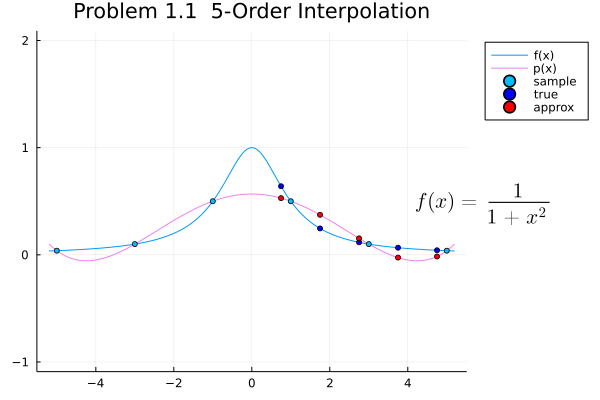

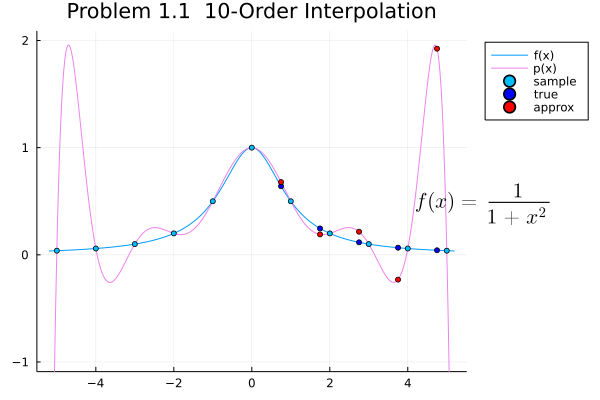

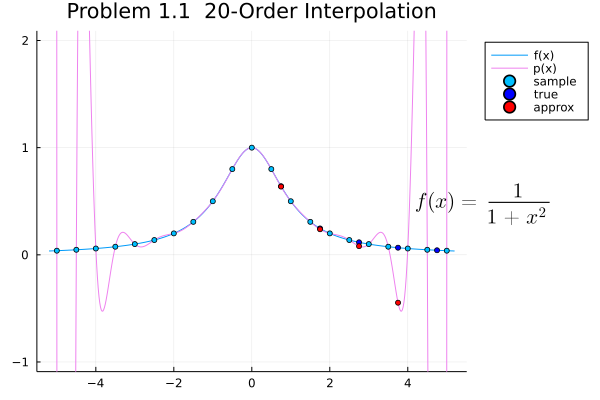

f(x) = 1 / (1 + x^2)

Problem 1.1  5-Order Interpolation:
┌─────────────┬─────────────┬─────────────┐
│   Test x    │   Test y    │   Pred y    │
├─────────────┼─────────────┼─────────────┤
│    0.750000 │    0.640000 │    0.528974 │
│    1.750000 │    0.246154 │    0.373325 │
│    2.750000 │    0.116788 │    0.153733 │
│    3.750000 │    0.066390 │   -0.025954 │
│    4.750000 │    0.042440 │   -0.015738 │
└─────────────┴─────────────┴─────────────┘

Problem 1.1  10-Order Interpolation:
┌─────────────┬─────────────┬─────────────┐
│   Test x    │   Test y    │   Pred y    │
├─────────────┼─────────────┼─────────────┤
│    0.750000 │    0.640000 │    0.678990 │
│    1.750000 │    0.246154 │    0.190580 │
│    2.750000 │    0.116788 │    0.215592 │
│    3.750000 │    0.066390 │   -0.231462 │
│    4.750000 │    0.042440 │    1.923631 │
└─────────────┴─────────────┴─────────────┘

Problem 1.1  20-Order Interpolation:
┌─────────────┬─────────────┬─────────────┐
│   Test x    │   Test y    │ 

In [70]:
f(x) = 1 / (1 + x^2)
split_nums = [5, 10, 20]
test_x = [0.75, 1.75, 2.75, 3.75, 4.75]
xlim = [-5, 5]
ylim = [-1, 2]
println("f(x) = 1 / (1 + x^2)")
prefix = "Problem 1.1 "
text = L"f(x)=\frac{1}{1+x^2}"
show_result(f, split_nums, test_x, xlim, ylim,prefix,text)

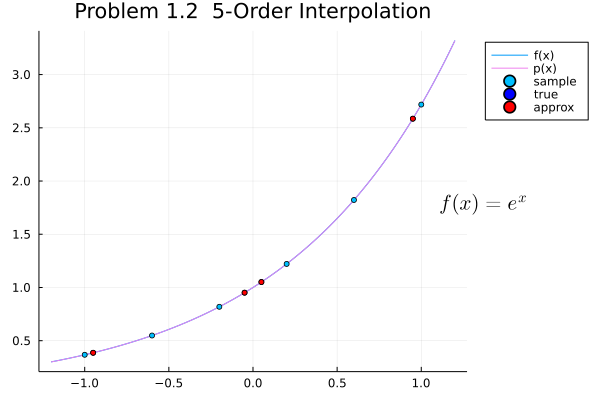

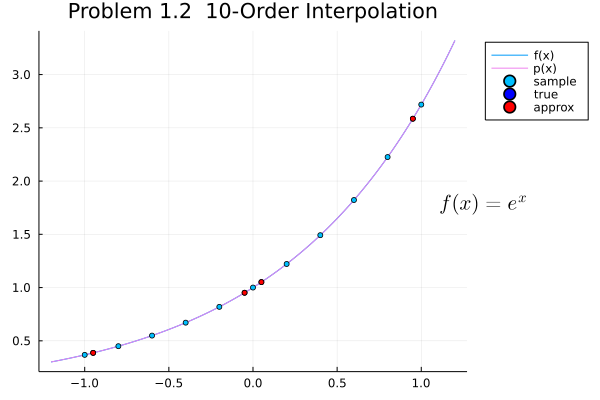

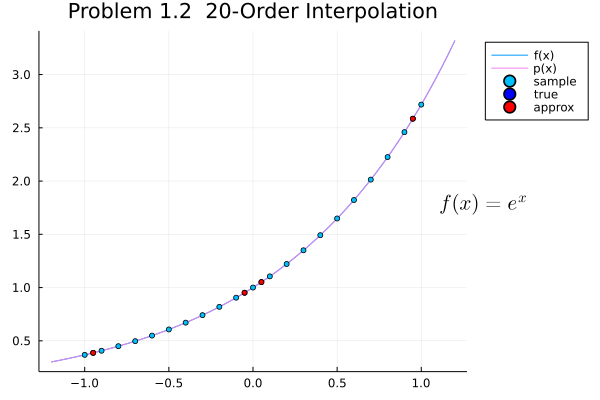

f(x) = exp(x)

Problem 1.2  5-Order Interpolation:
┌─────────────┬─────────────┬─────────────┐
│   Test x    │   Test y    │   Pred y    │
├─────────────┼─────────────┼─────────────┤
│   -0.950000 │    0.386741 │    0.386798 │
│   -0.050000 │    0.951229 │    0.951248 │
│    0.050000 │    1.051271 │    1.051290 │
│    0.950000 │    2.585710 │    2.585785 │
└─────────────┴─────────────┴─────────────┘

Problem 1.2  10-Order Interpolation:
┌─────────────┬─────────────┬─────────────┐
│   Test x    │   Test y    │   Pred y    │
├─────────────┼─────────────┼─────────────┤
│   -0.950000 │    0.386741 │    0.386741 │
│   -0.050000 │    0.951229 │    0.951229 │
│    0.050000 │    1.051271 │    1.051271 │
│    0.950000 │    2.585710 │    2.585710 │
└─────────────┴─────────────┴─────────────┘

Problem 1.2  20-Order Interpolation:
┌─────────────┬─────────────┬─────────────┐
│   Test x    │   Test y    │   Pred y    │
├─────────────┼─────────────┼─────────────┤
│   -0.950000 │    0.386741 │    0.38

In [71]:
f(x) = exp(x)
split_nums = [5, 10, 20]
test_x = [-0.95, -0.05, 0.05, 0.95]
xlim = [-1, 1]
# ylim = [-1, 10]  # the good-looking ylim is defined manually
ylim = []
println("f(x) = exp(x)")
prefix = "Problem 1.2 "
text = L"f(x)=e^x"
show_result(f, split_nums, test_x, xlim, ylim, prefix, text)

#### 问题 2

插值区间越小越好吗?

不一定，从精度上考虑虽然有一定的合理性，但插值节点过于密集时，一方面计算量增大却没提高对于精度计算的收益，另一方面区间缩短、节点增加并不能保证两节点间能很好的逼近函数，反而有可能出现Runge现象。但合理的对区间长度进行选择，同时采用低次插值来避免Runge现象，能够得到较好的拟合效果。 

不过，实例中对于函数$f(x)=\frac{1}{1+x^2}$，较短区间的插值效果比长区间插值更好

而函数$f(x)=e^x$无论是长区间还是短区间插值，都能得到相对较好的拟合效果，但短区间插值相对误差更低




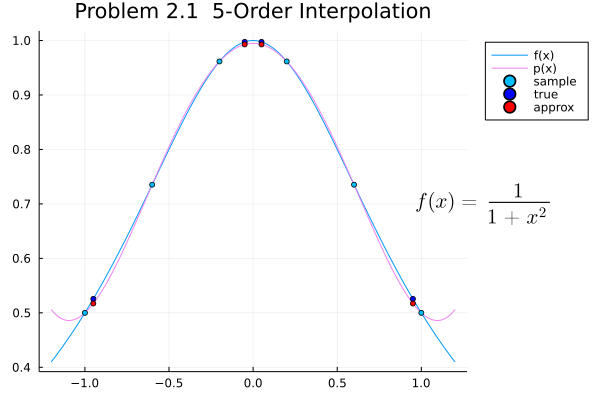

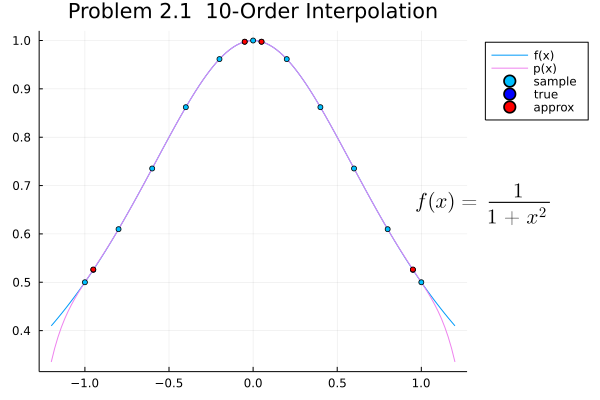

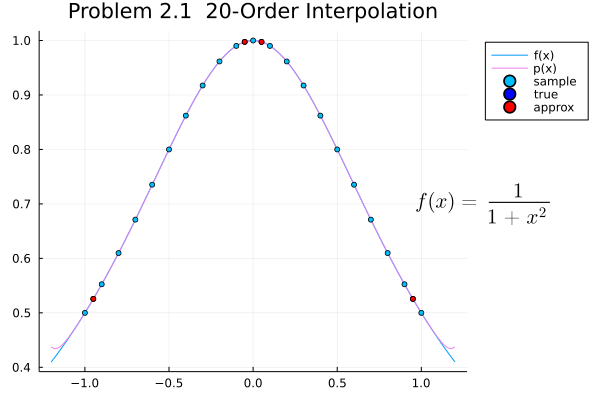

f(x) = 1 / (1 + x^2)

Problem 2.1  5-Order Interpolation:
┌─────────────┬─────────────┬─────────────┐
│   Test x    │   Test y    │   Pred y    │
├─────────────┼─────────────┼─────────────┤
│   -0.950000 │    0.525624 │    0.517147 │
│   -0.050000 │    0.997506 │    0.992791 │
│    0.050000 │    0.997506 │    0.992791 │
│    0.950000 │    0.525624 │    0.517147 │
└─────────────┴─────────────┴─────────────┘

Problem 2.1  10-Order Interpolation:
┌─────────────┬─────────────┬─────────────┐
│   Test x    │   Test y    │   Pred y    │
├─────────────┼─────────────┼─────────────┤
│   -0.950000 │    0.525624 │    0.526408 │
│   -0.050000 │    0.997506 │    0.997507 │
│    0.050000 │    0.997506 │    0.997507 │
│    0.950000 │    0.525624 │    0.526408 │
└─────────────┴─────────────┴─────────────┘

Problem 2.1  20-Order Interpolation:
┌─────────────┬─────────────┬─────────────┐
│   Test x    │   Test y    │   Pred y    │
├─────────────┼─────────────┼─────────────┤
│   -0.950000 │    0.525624 │ 

In [72]:
f(x) = 1 / (1 + x^2)
split_nums = [5, 10, 20]
test_x = [-0.95, -0.05, 0.05, 0.95]
xlim = [-1, 1]
# ylim = [-1, 2]
ylim = []
println("f(x) = 1 / (1 + x^2)")
prefix = "Problem 2.1 "
text = L"f(x) = \frac{1}{1+x^2}"
show_result(f, split_nums, test_x, xlim, ylim, prefix, text)

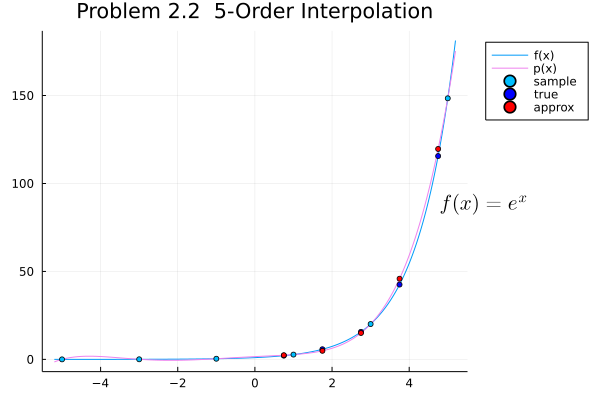

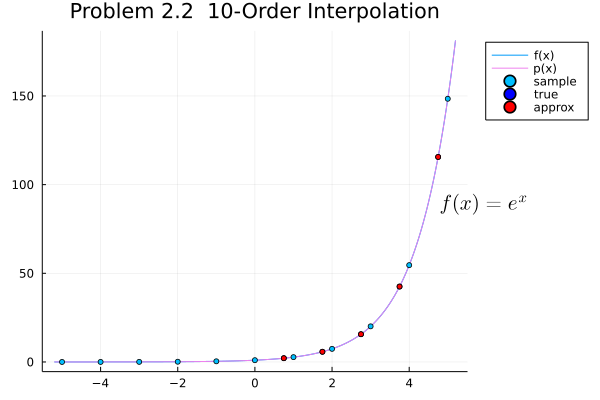

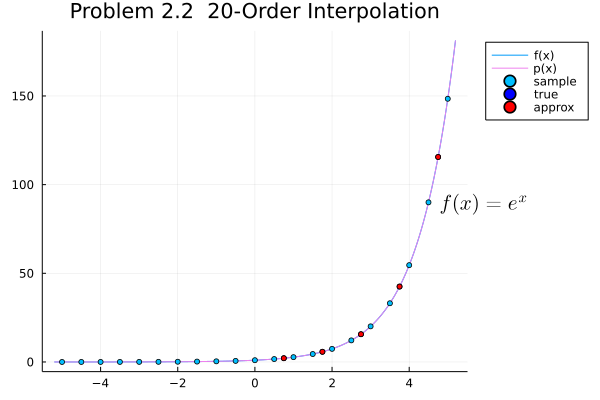

f(x) = exp(x)

Problem 2.2  5-Order Interpolation:
┌─────────────┬─────────────┬─────────────┐
│   Test x    │   Test y    │   Pred y    │
├─────────────┼─────────────┼─────────────┤
│    0.750000 │    2.117000 │    2.373957 │
│    1.750000 │    5.754603 │    4.871635 │
│    2.750000 │   15.642632 │   15.008061 │
│    3.750000 │   42.521082 │   45.862257 │
│    4.750000 │  115.584285 │  119.621007 │
└─────────────┴─────────────┴─────────────┘

Problem 2.2  10-Order Interpolation:
┌─────────────┬─────────────┬─────────────┐
│   Test x    │   Test y    │   Pred y    │
├─────────────┼─────────────┼─────────────┤
│    0.750000 │    2.117000 │    2.117136 │
│    1.750000 │    5.754603 │    5.754367 │
│    2.750000 │   15.642632 │   15.643248 │
│    3.750000 │   42.521082 │   42.518431 │
│    4.750000 │  115.584285 │  115.607360 │
└─────────────┴─────────────┴─────────────┘

Problem 2.2  20-Order Interpolation:
┌─────────────┬─────────────┬─────────────┐
│   Test x    │   Test y    │   Pred 

In [73]:
f(x) = exp(x)
split_nums = [5, 10, 20]
test_x = [0.75, 1.75, 2.75, 3.75, 4.75]
xlim = [-5, 5]
# ylim = [-1, 10]  # the good-looking ylim is defined manually
ylim = []
println("f(x) = exp(x)")
prefix = "Problem 2.2 "
text = L"f(x) = e^x"
show_result(f, split_nums, test_x, xlim, ylim, prefix, text)

#### 问题 4 

考虑拉格朗日插值问题，内插比外推更可靠吗？

不一定，这取决于函数的性质，但通常我们认为对于连续函数内插的可靠程度更高。

外推等价于根据已知点预测完全未知点的函数值，但我们所得的插值多项式不含有任何有关待拟合函数的已知点外的信息，根据多项式函数的特性进行外推是不合理的

而考虑到连续函数，内插则不会对于函数的拟合存在无根据的外推过程，有更高的可靠程度

从实验结果来看，第一个实例体现的是外推的严重错误，尽管第二个实例中外推所得误差稍小于内插结果，但在事实上这只是所选区间拟合的巧合，而内插误差虽然略高，却也具有相当低的误差和相当高的可靠程度

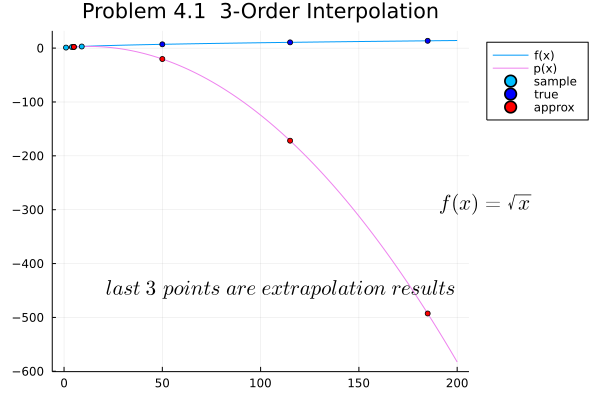

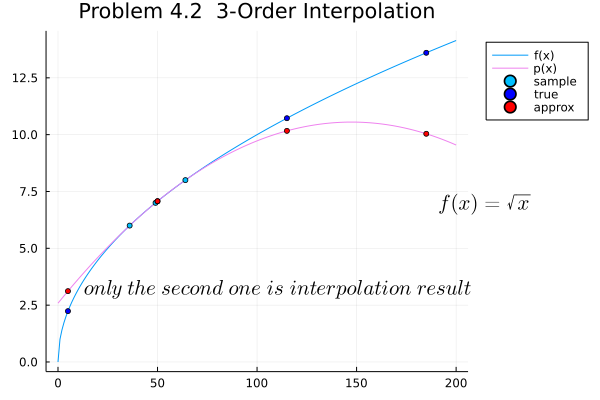

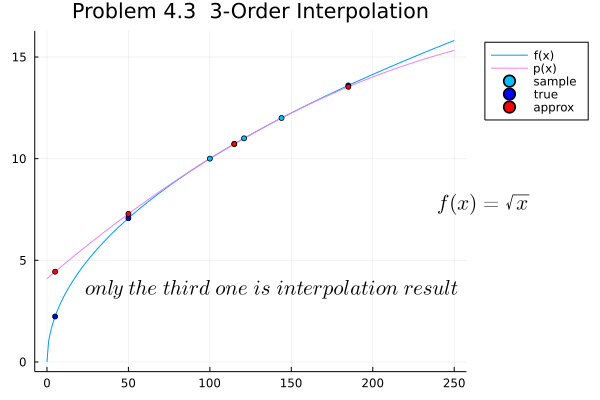

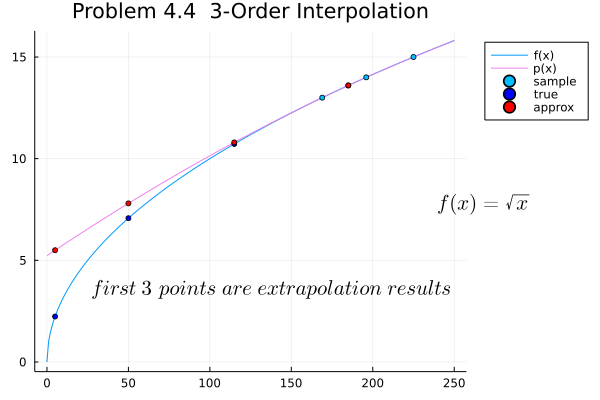

Problem 4.1  f(x) = sqrt(x)

┌─────────────┬─────────────┬─────────────┐
│   Test x    │   Test y    │   Pred y    │
├─────────────┼─────────────┼─────────────┤
│    5.000000 │    2.236068 │    2.266667 │
│   50.000000 │    7.071068 │  -20.233333 │
│  115.000000 │   10.723805 │ -171.900000 │
│  185.000000 │   13.601471 │ -492.733333 │
└─────────────┴─────────────┴─────────────┘
Problem 4.2  f(x) = sqrt(x)

┌─────────────┬─────────────┬─────────────┐
│   Test x    │   Test y    │   Pred y    │
├─────────────┼─────────────┼─────────────┤
│    5.000000 │    2.236068 │    3.115751 │
│   50.000000 │    7.071068 │    7.071795 │
│  115.000000 │   10.723805 │   10.167033 │
│  185.000000 │   13.601471 │   10.038828 │
└─────────────┴─────────────┴─────────────┘
Problem 4.3  f(x) = sqrt(x)

┌─────────────┬─────────────┬─────────────┐
│   Test x    │   Test y    │   Pred y    │
├─────────────┼─────────────┼─────────────┤
│    5.000000 │    2.236068 │    4.439112 │
│   50.000000 │    7.071068 │    

In [74]:
f(x) = sqrt(x)
split_xs = [1, 4, 9]
test_x = [5, 50, 115, 185]
xlim = [0, 200]
# ylim = [-1, 2]
ylim = []
println("Problem 4.1  f(x) = sqrt(x)")
prefix = "Problem 4.1 "
text = L"f(x) = \sqrt{x}"
comment = "This is a test commen"
comment = L"last~3~points~are~extrapolation~results"
show_result(f, nothing, split_xs, test_x, xlim, ylim, prefix, text, comment)

f(x) = sqrt(x)
split_xs = [36, 49, 64]
test_x = [5, 50, 115, 185]
xlim = [0, 200]
# ylim = [-1, 2]
ylim = []
println("Problem 4.2  f(x) = sqrt(x)")
prefix = "Problem 4.2 "
text = L"f(x) = \sqrt{x}"
comment = L"only~the~second~one~is~interpolation~result"
show_result(f, nothing, split_xs, test_x, xlim, ylim, prefix, text, comment)

f(x) = sqrt(x)
split_xs = [100, 121, 144]
test_x = [5, 50, 115, 185]
xlim = [0, 250]
# ylim = [-1, 2]
ylim = []
println("Problem 4.3  f(x) = sqrt(x)")
prefix = "Problem 4.3 "
text = L"f(x) = \sqrt{x}"
comment = L"only~the~third~one~is~interpolation~result"
show_result(f, nothing, split_xs, test_x, xlim, ylim, prefix, text,comment)

f(x) = sqrt(x)
split_xs = [169, 196, 225]
test_x = [5, 50, 115, 185]
xlim = [0, 250]
# ylim = [-1, 2]
ylim = []
println("Problem 4.4  f(x) = sqrt(x)")
prefix = "Problem 4.4 "
text = L"f(x) = \sqrt{x}"
comment = L"first~3~points~are~extrapolation~results"
show_result(f, nothing, split_xs, test_x, xlim, ylim, prefix, text, comment)

### 答案汇总

#### 问题 1.1

$f(x) = \frac{1}{1 + x^2}$

```
Problem 1.1  5-Order Interpolation:
┌─────────────┬─────────────┬─────────────┐
│   Test x    │   Test y    │   Pred y    │
├─────────────┼─────────────┼─────────────┤
│    0.750000 │    0.640000 │    0.528974 │
│    1.750000 │    0.246154 │    0.373325 │
│    2.750000 │    0.116788 │    0.153733 │
│    3.750000 │    0.066390 │   -0.025954 │
│    4.750000 │    0.042440 │   -0.015738 │
└─────────────┴─────────────┴─────────────┘

Problem 1.1  10-Order Interpolation:
┌─────────────┬─────────────┬─────────────┐
│   Test x    │   Test y    │   Pred y    │
├─────────────┼─────────────┼─────────────┤
│    0.750000 │    0.640000 │    0.678990 │
│    1.750000 │    0.246154 │    0.190580 │
│    2.750000 │    0.116788 │    0.215592 │
│    3.750000 │    0.066390 │   -0.231462 │
│    4.750000 │    0.042440 │    1.923631 │
└─────────────┴─────────────┴─────────────┘

Problem 1.1  20-Order Interpolation:
┌─────────────┬─────────────┬─────────────┐
│   Test x    │   Test y    │   Pred y    │
├─────────────┼─────────────┼─────────────┤
│    0.750000 │    0.640000 │    0.636755 │
│    1.750000 │    0.246154 │    0.238446 │
│    2.750000 │    0.116788 │    0.080660 │
│    3.750000 │    0.066390 │   -0.447052 │
│    4.750000 │    0.042440 │  -39.952449 │
└─────────────┴─────────────┴─────────────┘
```

#### 问题 1.2

$f(x) = e^x$

```
Problem 1.2  5-Order Interpolation:
┌─────────────┬─────────────┬─────────────┐
│   Test x    │   Test y    │   Pred y    │
├─────────────┼─────────────┼─────────────┤
│   -0.950000 │    0.386741 │    0.386798 │
│   -0.050000 │    0.951229 │    0.951248 │
│    0.050000 │    1.051271 │    1.051290 │
│    0.950000 │    2.585710 │    2.585785 │
└─────────────┴─────────────┴─────────────┘

Problem 1.2  10-Order Interpolation:
┌─────────────┬─────────────┬─────────────┐
│   Test x    │   Test y    │   Pred y    │
├─────────────┼─────────────┼─────────────┤
│   -0.950000 │    0.386741 │    0.386741 │
│   -0.050000 │    0.951229 │    0.951229 │
│    0.050000 │    1.051271 │    1.051271 │
│    0.950000 │    2.585710 │    2.585710 │
└─────────────┴─────────────┴─────────────┘

Problem 1.2  20-Order Interpolation:
┌─────────────┬─────────────┬─────────────┐
│   Test x    │   Test y    │   Pred y    │
├─────────────┼─────────────┼─────────────┤
│   -0.950000 │    0.386741 │    0.386741 │
│   -0.050000 │    0.951229 │    0.951229 │
│    0.050000 │    1.051271 │    1.051271 │
│    0.950000 │    2.585710 │    2.585710 │
└─────────────┴─────────────┴─────────────┘
```

#### 问题 2.1

$f(x) = \frac{1}{1 + x^2}$

```
Problem 2.1  5-Order Interpolation:
┌─────────────┬─────────────┬─────────────┐
│   Test x    │   Test y    │   Pred y    │
├─────────────┼─────────────┼─────────────┤
│   -0.950000 │    0.525624 │    0.517147 │
│   -0.050000 │    0.997506 │    0.992791 │
│    0.050000 │    0.997506 │    0.992791 │
│    0.950000 │    0.525624 │    0.517147 │
└─────────────┴─────────────┴─────────────┘

Problem 2.1  10-Order Interpolation:
┌─────────────┬─────────────┬─────────────┐
│   Test x    │   Test y    │   Pred y    │
├─────────────┼─────────────┼─────────────┤
│   -0.950000 │    0.525624 │    0.526408 │
│   -0.050000 │    0.997506 │    0.997507 │
│    0.050000 │    0.997506 │    0.997507 │
│    0.950000 │    0.525624 │    0.526408 │
└─────────────┴─────────────┴─────────────┘

Problem 2.1  20-Order Interpolation:
┌─────────────┬─────────────┬─────────────┐
│   Test x    │   Test y    │   Pred y    │
├─────────────┼─────────────┼─────────────┤
│   -0.950000 │    0.525624 │    0.525620 │
│   -0.050000 │    0.997506 │    0.997506 │
│    0.050000 │    0.997506 │    0.997506 │
│    0.950000 │    0.525624 │    0.525620 │
└─────────────┴─────────────┴─────────────┘
```

#### 问题 2.2

f(x) = $e^x$

```
Problem 2.2  5-Order Interpolation:
┌─────────────┬─────────────┬─────────────┐
│   Test x    │   Test y    │   Pred y    │
├─────────────┼─────────────┼─────────────┤
│    0.750000 │    2.117000 │    2.373957 │
│    1.750000 │    5.754603 │    4.871635 │
│    2.750000 │   15.642632 │   15.008061 │
│    3.750000 │   42.521082 │   45.862257 │
│    4.750000 │  115.584285 │  119.621007 │
└─────────────┴─────────────┴─────────────┘

Problem 2.2  10-Order Interpolation:
┌─────────────┬─────────────┬─────────────┐
│   Test x    │   Test y    │   Pred y    │
├─────────────┼─────────────┼─────────────┤
│    0.750000 │    2.117000 │    2.117136 │
│    1.750000 │    5.754603 │    5.754367 │
│    2.750000 │   15.642632 │   15.643248 │
│    3.750000 │   42.521082 │   42.518431 │
│    4.750000 │  115.584285 │  115.607360 │
└─────────────┴─────────────┴─────────────┘

Problem 2.2  20-Order Interpolation:
┌─────────────┬─────────────┬─────────────┐
│   Test x    │   Test y    │   Pred y    │
├─────────────┼─────────────┼─────────────┤
│    0.750000 │    2.117000 │    2.117000 │
│    1.750000 │    5.754603 │    5.754603 │
│    2.750000 │   15.642632 │   15.642632 │
│    3.750000 │   42.521082 │   42.521082 │
│    4.750000 │  115.584285 │  115.584285 │
└─────────────┴─────────────┴─────────────┘
```

#### 问题 4.1-4.4

```
Problem 4.1  f(x) = sqrt(x)

┌─────────────┬─────────────┬─────────────┐
│   Test x    │   Test y    │   Pred y    │
├─────────────┼─────────────┼─────────────┤
│    5.000000 │    2.236068 │    2.266667 │
│   50.000000 │    7.071068 │  -20.233333 │
│  115.000000 │   10.723805 │ -171.900000 │
│  185.000000 │   13.601471 │ -492.733333 │
└─────────────┴─────────────┴─────────────┘
Problem 4.2  f(x) = sqrt(x)

┌─────────────┬─────────────┬─────────────┐
│   Test x    │   Test y    │   Pred y    │
├─────────────┼─────────────┼─────────────┤
│    5.000000 │    2.236068 │    3.115751 │
│   50.000000 │    7.071068 │    7.071795 │
│  115.000000 │   10.723805 │   10.167033 │
│  185.000000 │   13.601471 │   10.038828 │
└─────────────┴─────────────┴─────────────┘
Problem 4.3  f(x) = sqrt(x)

┌─────────────┬─────────────┬─────────────┐
│   Test x    │   Test y    │   Pred y    │
├─────────────┼─────────────┼─────────────┤
│    5.000000 │    2.236068 │    4.439112 │
│   50.000000 │    7.071068 │    7.284961 │
│  115.000000 │   10.723805 │   10.722756 │
│  185.000000 │   13.601471 │   13.535667 │
└─────────────┴─────────────┴─────────────┘
Problem 4.4  f(x) = sqrt(x)

┌─────────────┬─────────────┬─────────────┐
│   Test x    │   Test y    │   Pred y    │
├─────────────┼─────────────┼─────────────┤
│    5.000000 │    2.236068 │    5.497172 │
│   50.000000 │    7.071068 │    7.800128 │
│  115.000000 │   10.723805 │   10.800493 │
│  185.000000 │   13.601471 │   13.600620 │
└─────────────┴─────────────┴─────────────┘
```

### 思考题

1. 对实验 1 存在的问题，应如何解决？

   当插值多项式次数过高的时候会出现Runge现象，插值多项式在距离已知点位置较远处会剧烈震荡，越靠近端点，逼近的效果越差，这表明了节点的密集不一定能保证在两节点间插值函数逼近程度的上升。

   这一问题的解决方案主要有两类。
   
   一个是从插值函数的二阶导数剧烈变化出发，修改插值条件对插值函数的二阶导数进行限制，如使用Hermite型插值；
   
   另一种是将长区间划分为若干个小区间，在每一个小区间上分别做低次插值来避免Runge现象，逼近效果要比在整个区间上用高阶光滑差值效果更好，即使用分段插值和样条插值。

2. 对实验 2 存在的问题的回答，试加以说明

   首先不一定，从精度上考虑虽然有一定的合理性，但插值节点过于密集时，一方面计算量增大却没提高对于精度计算的收益，另一方面区间缩短、节点增加并不能保证两节点间能很好的逼近函数，反而有可能出现Runge现象。但合理的对区间长度进行选择，同时采用低次插值来避免Runge现象，能够得到较好的拟合效果。
   
   不过，实例中对于函数$f(x)=\frac{1}{1+x^2}$，较短区间的插值效果比长区间插值更好
   
   而函数$f(x)=e^x$无论是长区间还是短区间插值，都能得到相对较好的拟合效果，但短区间插值相对误差更低

3. 略

4. 如何理解插值问题中的内插和外推？

   通常我们认为对于连续函数内插的可靠程度高于外推，因为对于未知的连续函数而言，我们无法预知任何在已知点信息之外的有关函数的信息，无法简单通过多项式插值来对函数趋势进行判断。
   
   外推等价于根据已知点预测完全未知点的函数值，但我们所得的插值多项式不含有任何有关待拟合函数的已知点外的信息，我们没有理由认为实际函数的变化必须符合多项式函数的变化，根据多项式函数的特性进行外推是不合理的，故这里我们可以简单的认为即时出现外推的结果相比于内插更好的情况，也很大程度上是函数本身特性导致的巧合，当然，或许也可以根据函数的性质来决定函数是否适合进行多项式差值的外推。
   
   认为内插比外推可靠的原因是，在内插的区间我们认为连续函数在相邻点间的变化不会过于剧烈，从而可以简单的认为内插更加可靠，而外推时我们没有任何而先验知识可以用于对完全未知的区间函数值进行推断。
   
   从实验结果来看，第一个实例体现的是外推的严重错误，尽管第二个实例中外推所得误差稍小于内插结果，但在事实上根据推断这只是所选区间拟合的巧合，而内插误差虽然略高，却也具有相当低的误差和相当高的可靠程度

### 参考资料

1. julia plot xlim and ylim https://stackoverflow.com/questions/53230969/how-to-scale-a-plot-in-julia-using-plots-jl
2. julia fill array with specific value https://www.geeksforgeeks.org/fill-an-array-with-specific-values-in-julia-array-fill-method/
3. julia prettytabels https://ronisbr.github.io/PrettyTables.jl/stable/
4. 教材《数值分析原理》吴勃英 105-106,123